In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path in Google Drive
file_path = "/content/drive/My Drive/cleaned_encoded.csv"
df=pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
pd.set_option('display.max_columns', None)
df

,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow,Year,Month,Day,WindGustDirection_sin,WindGustDirection_cos,WindDirection9am_sin,WindDirection9am_cos,WindDirection3pm_sin,WindDirection3pm_cos
0,0.203289,13.4,22.900000,0.6,5.318667,7.611178,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.923880,3.826834e-01
1,0.203289,7.4,25.100000,0.0,5.318667,7.611178,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-3.826834e-01
2,0.203289,12.9,25.700000,0.0,5.318667,7.611178,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3,-0.923880,-3.826834e-01,-1.000000,-1.836970e-16,-0.923880,-3.826834e-01
3,0.203289,9.2,28.000000,0.0,5.318667,7.611178,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,6.123234e-17
4,0.203289,17.5,32.300000,1.0,5.318667,7.611178,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5,-1.000000,-1.836970e-16,0.923880,3.826834e-01,-0.707107,7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.073511,2.8,23.400000,0.0,5.318667,7.611178,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,2017,6,21,1.000000,6.123234e-17,0.707107,-7.071068e-01,0.923880,3.826834e-01
145456,0.073511,3.6,25.300000,0.0,5.318667,7.611178,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,2017,6,22,-0.382683,9.238795e-01,0.707107,-7.071068e-01,0.000000,1.000000e+00
145457,0.073511,5.4,26.900000,0.0,5.318667,7.611178,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,2017,6,23,0.000000,1.000000e+00,0.707107,-7.071068e-01,-0.923880,3.826834e-01
145458,0.073511,7.8,27.000000,0.0,5.318667,7.611178,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0,2017,6,24,0.707107,-7.071068e-01,0.382683,-9.238795e-01,0.000000,1.000000e+00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Location               145460 non-null  float64
 1   MinimumTemperature     145460 non-null  float64
 2   MaximumTemperature     145460 non-null  float64
 3   Rainfall               145460 non-null  float64
 4   Evaporation            145460 non-null  float64
 5   Sunshine               145460 non-null  float64
 6   WindGustSpeed          145460 non-null  float64
 7   WindSpeed9am           145460 non-null  float64
 8   WindSpeed3pm           145460 non-null  float64
 9   Humidity9am            145460 non-null  float64
 10  Humidity3pm            145460 non-null  float64
 11  Pressure9am            145460 non-null  float64
 12  Pressure3pm            145460 non-null  float64
 13  Cloud9am               145460 non-null  float64
 14  Cloud3pm               145460 non-nu

In [4]:
#test and train split

In [5]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = df.drop(columns=["CloudBurstTomorrow"])  # Features
y = df["CloudBurstTomorrow"]  # Target variable

# Splitting (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the split
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (116368, 27), Test set: (29092, 27)


In [6]:
#feature selection

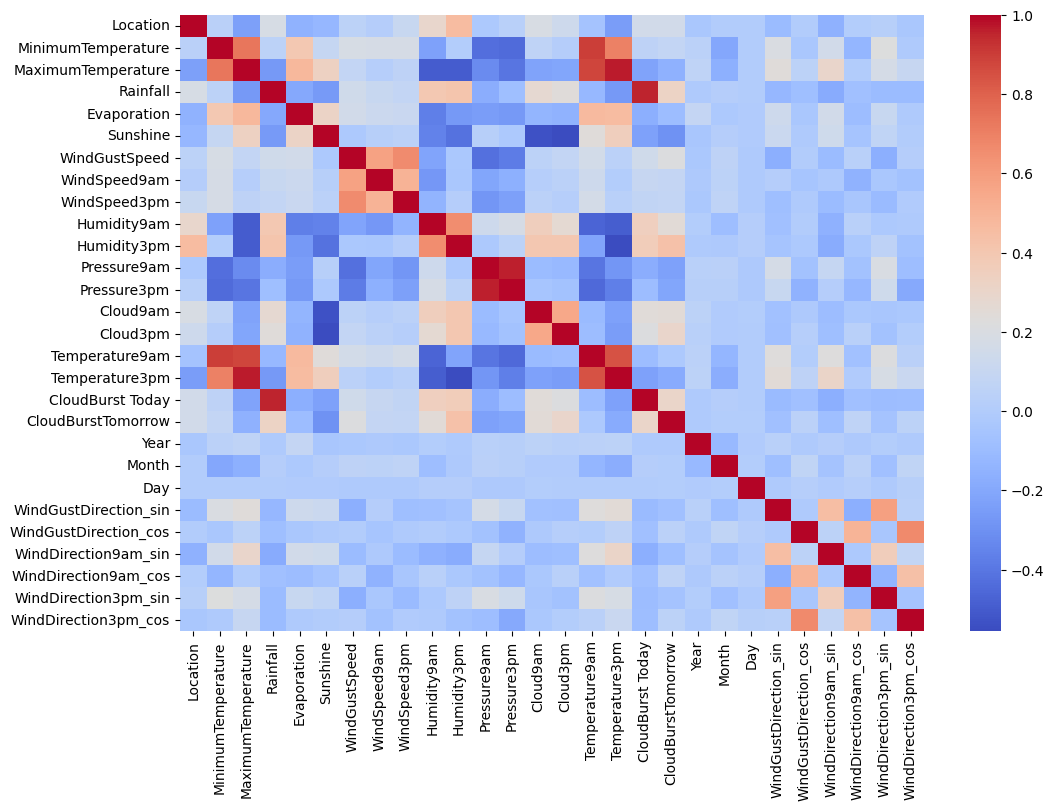

In [7]:
#coorelation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.show()


In [8]:
#using random forest feature importance for selecting


''' Why Not Filtering (e.g., Mutual Information, Chi-Square)?

Filtering methods ignore feature interactions, while Random Forest considers dependencies.
Filtering works best for simple, linear relationships, but your dataset is likely more compl\
Why Not Wrapper (e.g., RFE)?

Wrapper methods are slow because they train multiple models iteratively.
Not practical for large datasets like yours (145,460 rows).'''

' Why Not Filtering (e.g., Mutual Information, Chi-Square)?\n\nFiltering methods ignore feature interactions, while Random Forest considers dependencies.\nFiltering works best for simple, linear relationships, but your dataset is likely more complWhy Not Wrapper (e.g., RFE)?\n\nWrapper methods are slow because they train multiple models iteratively.\nNot practical for large datasets like yours (145,460 rows).'

In [9]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Select top features (e.g., top 10)
selected_features = feature_importances.nlargest(10).index
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("Selected Features:", selected_features)


Selected Features: Index(['Humidity3pm', 'Pressure3pm', 'Humidity9am', 'Pressure9am',
       'WindGustSpeed', 'Temperature3pm', 'MinimumTemperature', 'Sunshine',
       'Rainfall', 'MaximumTemperature'],
      dtype='object')


In [10]:
len(selected_features)

10

In [ ]:
#testing rand forest acc be and after feature selection

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train with all features
rf_all = RandomForestClassifier(n_estimators=100, random_state=42)
rf_all.fit(X_train, y_train)
y_pred_all = rf_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

# Train with selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train[selected_features], y_train)
y_pred_selected = rf_selected.predict(X_test[selected_features])
acc_selected = accuracy_score(y_test, y_pred_selected)

print("Accuracy with All Features:", acc_all)
print("Accuracy with Selected Features:", acc_selected)


Accuracy with All Features: 0.8596865117558091
Accuracy with Selected Features: 0.8513680736972363


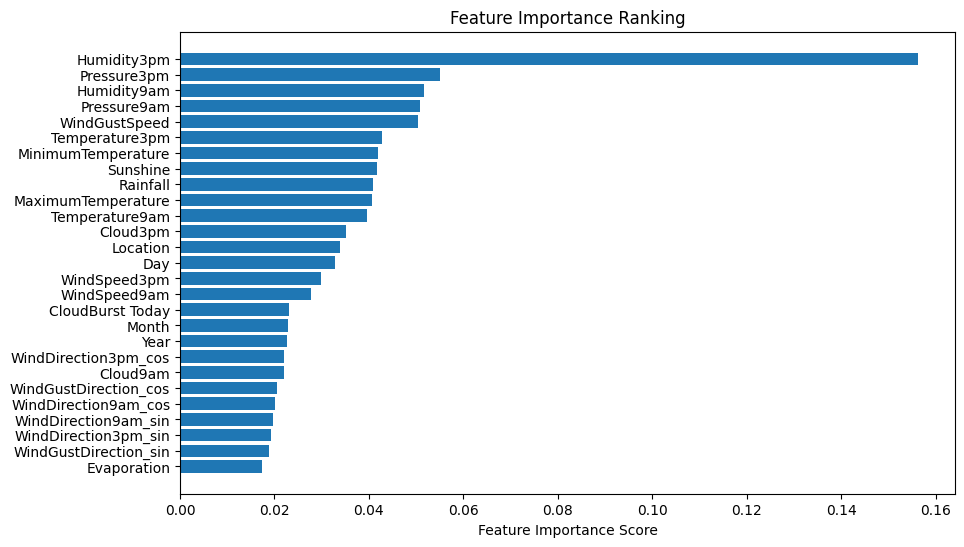

In [ ]:
#difference of 0.0083184380585728
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importance = rf_all.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order

plt.figure(figsize=(10,6))
plt.barh(np.array(X_train.columns)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance Ranking")
plt.gca().invert_yaxis()  # Invert to show highest at the top
plt.show()


In [ ]:
'''# Set threshold (adjust if needed)
threshold = 0.05

# Get selected feature names
selected_features = X_train.columns[rf_all.feature_importances_ > threshold]

# Filter the dataset
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"Selected Features ({len(selected_features)}): {list(selected_features)}")
'''

Selected Features (5): ['WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']


In [ ]:
'''# Train Random Forest again with selected features
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate accuracy
accuracy_selected = rf_selected.score(X_test_selected, y_test)
print(f"Accuracy with Selected Features: {accuracy_selected:.4f}")


Accuracy with Selected Features: 0.8352


In [ ]:
#abandon this method
# using rfe

In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Step 1: Define Features (X) and Target (y)
X = df.drop(columns=["CloudBurstTomorrow"])  # Features
y = df["CloudBurstTomorrow"]  # Target variable

# Step 2: Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Define Base Model for RFE (Random Forest)
rf_model = RandomForestClassifier(random_state=42)

# Step 4: Apply RFE with 10 Features (Adjustable)
rfe = RFE(estimator=rf_model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Step 5: Get Selected Features
selected_rfe_features = X_train.columns[rfe.support_]

# Step 6: Filter Dataset with Selected Features
X_train_rfe = X_train[selected_rfe_features]
X_test_rfe = X_test[selected_rfe_features]

print(f"Selected Features ({len(selected_rfe_features)}): {list(selected_rfe_features)}")

# Step 7: Train Random Forest on Selected Features
rf_rfe = RandomForestClassifier(random_state=42)
rf_rfe.fit(X_train_rfe, y_train)

# Step 8: Evaluate Model Accuracy
accuracy_rfe = rf_rfe.score(X_test_rfe, y_test)
print(f"Accuracy with RFE Features: {accuracy_rfe:.4f}")


Selected Features (10): ['MinimumTemperature', 'MaximumTemperature', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temperature9am', 'Temperature3pm']
Accuracy with RFE Features: 0.8492


In [ ]:
'''# Train Random Forest on All Features
rf_all = RandomForestClassifier(random_state=42)
rf_all.fit(X_train, y_train)

# Evaluate Accuracy
accuracy_all = rf_all.score(X_test, y_test)
print(f"Accuracy with All Features: {accuracy_all:.4f}")


Accuracy with All Features: 0.8597


In [ ]:
X_train

,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,CloudBurst Today,Year,Month,Day,WindGustDirection_sin,WindGustDirection_cos,WindDirection9am_sin,WindDirection9am_cos,WindDirection3pm_sin,WindDirection3pm_cos
108450,0.067132,15.3,30.8,0.0,7.296667,7.611178,46.000000,24.0,24.0,60.0,...,0,2017,2,25,3.826834e-01,-9.238795e-01,3.826834e-01,-9.238795e-01,0.382683,-9.238795e-01
106460,0.067132,4.5,15.5,0.0,2.022000,5.977944,33.000000,9.0,20.0,85.0,...,0,2011,7,18,1.224647e-16,-1.000000e+00,-3.826834e-01,-9.238795e-01,-0.382683,-9.238795e-01
55052,0.269408,-3.1,5.7,1.5,5.318667,7.611178,68.500000,20.0,13.0,78.0,...,1,2017,5,7,-1.000000e+00,-1.836970e-16,-3.826834e-01,-9.238795e-01,-0.707107,-7.071068e-01
6608,0.128282,7.4,14.9,1.5,2.022000,8.500000,56.000000,19.0,20.0,70.0,...,1,2010,7,14,-9.238795e-01,-3.826834e-01,-1.000000e+00,-1.836970e-16,-1.000000,-1.836970e-16
9341,0.288800,12.1,19.8,1.5,5.600000,5.977944,39.837792,9.0,20.0,86.0,...,1,2009,10,11,-1.000000e+00,-1.836970e-16,-9.238795e-01,-3.826834e-01,0.707107,7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.203289,5.7,17.5,0.0,5.318667,7.611178,20.000000,2.0,6.0,89.0,...,0,2010,5,7,-1.000000e+00,-1.836970e-16,1.224647e-16,-1.000000e+00,-0.923880,3.826834e-01
123997,0.157281,5.2,19.4,0.2,5.318667,7.611178,30.000000,9.0,15.0,73.0,...,0,2009,6,16,-9.238795e-01,3.826834e-01,-9.238795e-01,3.826834e-01,-0.707107,7.071068e-01
58256,0.184868,13.8,30.0,0.4,2.022000,7.611178,43.000000,7.0,24.0,55.0,...,0,2009,3,25,0.000000e+00,1.000000e+00,1.224647e-16,-1.000000e+00,-0.382683,9.238795e-01
84461,0.222048,8.7,25.6,0.0,7.296667,10.333234,44.000000,19.0,24.0,27.0,...,0,2009,9,28,-9.238795e-01,3.826834e-01,-1.000000e+00,-1.836970e-16,-1.000000,-1.836970e-16


In [13]:
# Convert selected_features to a list before appending
selected_features = list(selected_features)
selected_features.append("Humidity3pm")

# Train with updated selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train[selected_features], y_train)
y_pred_selected = rf_selected.predict(X_test[selected_features])
acc_selected = accuracy_score(y_test, y_pred_selected)

print("Accuracy with Updated Selected Features:", acc_selected)


Accuracy with Updated Selected Features: 0.8515055685411798


In [15]:
len(selected_features)
selected_features

['Humidity3pm',
 'Pressure3pm',
 'Humidity9am',
 'Pressure9am',
 'WindGustSpeed',
 'Temperature3pm',
 'MinimumTemperature',
 'Sunshine',
 'Rainfall',
 'MaximumTemperature',
 'Humidity3pm']

                  Feature  Importance
10            Humidity3pm    0.156256
12            Pressure3pm    0.055144
9             Humidity9am    0.051581
11            Pressure9am    0.050774
6           WindGustSpeed    0.050373
16         Temperature3pm    0.042739
1      MinimumTemperature    0.041965
5                Sunshine    0.041670
3                Rainfall    0.040949
2      MaximumTemperature    0.040675
15         Temperature9am    0.039653
14               Cloud3pm    0.035154
0                Location    0.033943
20                    Day    0.032773
8            WindSpeed3pm    0.029849
7            WindSpeed9am    0.027780
17       CloudBurst Today    0.023052
19                  Month    0.022916
18                   Year    0.022664
26   WindDirection3pm_cos    0.022043
13               Cloud9am    0.022009
22  WindGustDirection_cos    0.020482
24   WindDirection9am_cos    0.020215
23   WindDirection9am_sin    0.019720
25   WindDirection3pm_sin    0.019313
21  WindGust

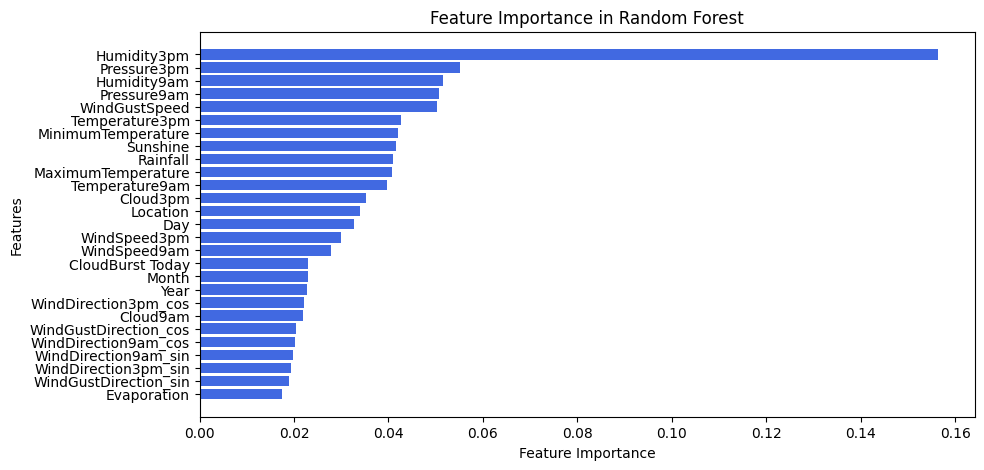

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance values
feature_importance = rf_all.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort features by importance (descending)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance values
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [17]:
print(X_train.columns[X_train.columns.duplicated()])


Index([], dtype='object')


In [18]:
selected_features

['Humidity3pm',
 'Pressure3pm',
 'Humidity9am',
 'Pressure9am',
 'WindGustSpeed',
 'Temperature3pm',
 'MinimumTemperature',
 'Sunshine',
 'Rainfall',
 'MaximumTemperature',
 'Humidity3pm']

In [19]:
selected_features = list(dict.fromkeys(selected_features))
print("Updated Selected Features:", selected_features)


Updated Selected Features: ['Humidity3pm', 'Pressure3pm', 'Humidity9am', 'Pressure9am', 'WindGustSpeed', 'Temperature3pm', 'MinimumTemperature', 'Sunshine', 'Rainfall', 'MaximumTemperature']


In [20]:
# Convert selected_features to a list before appending
selected_features = list(selected_features)
selected_features.append("Humidity3pm")

# Train with updated selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train[selected_features], y_train)
y_pred_selected = rf_selected.predict(X_test[selected_features])
acc_selected = accuracy_score(y_test, y_pred_selected)

print("Accuracy with Updated Selected Features:", acc_selected)


Accuracy with Updated Selected Features: 0.8515055685411798


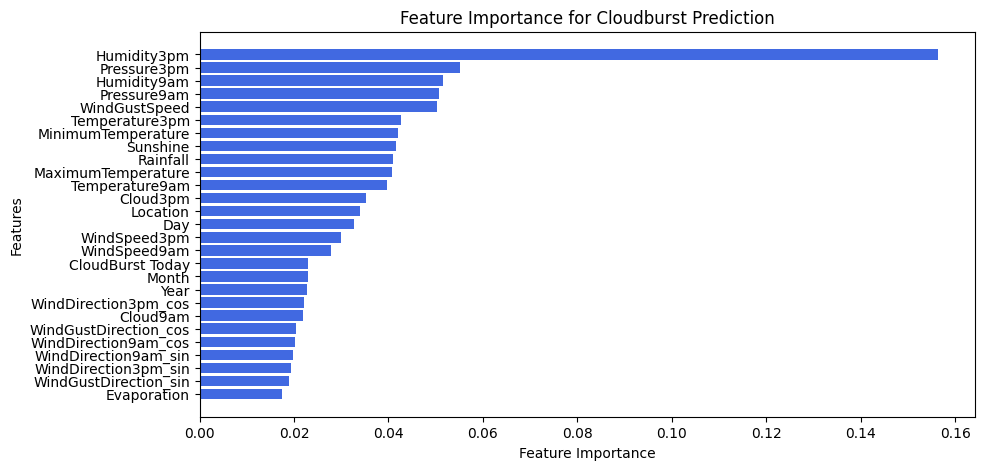

In [21]:
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Cloudburst Prediction")
plt.gca().invert_yaxis()
plt.show()


In [22]:
#hyp tun

In [24]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred))


Baseline Accuracy: 0.8596865117558091


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import time

# Define the parameter grid (reduced values for speed)
param_dist = {
    'n_estimators': [50, 100, 200],  # Removed 300, 400, 500 to speed up
    'max_depth': [5, 10, 20],  # Removed None to avoid excessive depth
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']  # Removed None (which uses all features)
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Use fewer iterations (n_iter=5) and cross-validation folds (cv=3) for faster tuning
random_search = RandomizedSearchCV(
    rf, param_dist, n_iter=5, cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)

# Start timing
start_time = time.time()

# Train the model with hyperparameter tuning
random_search.fit(X_train, y_train)

# End timing
end_time = time.time()

# Best hyperparameters and accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)
print(f"Time Taken: {end_time - start_time:.2f} seconds")


Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 20}
Best Accuracy: 0.8555874476594222
Time Taken: 239.65 seconds


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [random_search.best_params_['n_estimators'] - 50, random_search.best_params_['n_estimators'], random_search.best_params_['n_estimators'] + 50],
    'max_depth': [random_search.best_params_['max_depth'] - 5, random_search.best_params_['max_depth'], random_search.best_params_['max_depth'] + 5],
    'min_samples_split': [random_search.best_params_['min_samples_split'] - 2, random_search.best_params_['min_samples_split'], random_search.best_params_['min_samples_split'] + 2]
}

grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Final Best Parameters:", grid_search.best_params_)
print("Final Best Accuracy:", grid_search.best_score_)


KeyboardInterrupt: 

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions using the best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91     22717
           1       0.77      0.51      0.62      6375

    accuracy                           0.86     29092
   macro avg       0.83      0.74      0.77     29092
weighted avg       0.85      0.86      0.85     29092

Confusion Matrix:
 [[21762   955]
 [ 3092  3283]]


In [35]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Retrain the best model on balanced data
best_rf = random_search.best_estimator_
best_rf.fit(X_resampled, y_resampled)

# Feature Importance Analysis
feature_importances = best_rf.feature_importances_
important_features = np.argsort(feature_importances)[::-1][:10]  # Select top 10 features
X_train_selected = X_train.iloc[:, important_features]
X_test_selected = X_test.iloc[:, important_features]

# Retrain on selected features
best_rf.fit(X_train_selected, y_train)
y_pred = best_rf.predict(X_test_selected)

# Evaluate
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22717
           1       0.74      0.51      0.60      6375

    accuracy                           0.85     29092
   macro avg       0.81      0.73      0.76     29092
weighted avg       0.84      0.85      0.84     29092


Confusion Matrix:
 [[21589  1128]
 [ 3143  3232]]


In [36]:
rf = RandomForestClassifier(class_weight={0:1, 1:2}, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     22717
           1       0.78      0.49      0.60      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.73      0.76     29092
weighted avg       0.85      0.86      0.85     29092


Confusion Matrix:
 [[21835   882]
 [ 3256  3119]]


In [37]:
# xg boost

In [38]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88     22717
           1       0.57      0.79      0.66      6375

    accuracy                           0.82     29092
   macro avg       0.75      0.81      0.77     29092
weighted avg       0.85      0.82      0.83     29092


Confusion Matrix:
 [[18909  3808]
 [ 1349  5026]]


In [39]:
# remove noisy features

In [40]:
important_features = np.argsort(rf.feature_importances_)[::-1][:10]
X_train_selected = X_train.iloc[:, important_features]
X_test_selected = X_test.iloc[:, important_features]

rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22717
           1       0.75      0.49      0.59      6375

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092


Confusion Matrix:
 [[21658  1059]
 [ 3247  3128]]


In [41]:
y_proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.45).astype(int)  # Reduce threshold to favor recall

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.87     22717
           1       0.54      0.82      0.65      6375

    accuracy                           0.81     29092
   macro avg       0.74      0.81      0.76     29092
weighted avg       0.85      0.81      0.82     29092


Confusion Matrix:
 [[18225  4492]
 [ 1139  5236]]


In [42]:
xgb = XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Balances classes
    max_depth=6, learning_rate=0.1, n_estimators=300, colsample_bytree=0.8
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88     22717
           1       0.57      0.80      0.67      6375

    accuracy                           0.82     29092
   macro avg       0.75      0.81      0.77     29092
weighted avg       0.86      0.82      0.83     29092


Confusion Matrix:
 [[18917  3800]
 [ 1303  5072]]


In [43]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, max_depth=6, n_estimators=300)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"New Class 0: {sum(y_train_resampled == 0)}, New Class 1: {sum(y_train_resampled == 1)}")


New Class 0: 90866, New Class 1: 90866


In [45]:
y_proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.48).astype(int)  # Adjust the threshold


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities
y_proba = xgb.predict_proba(X_test)[:, 1]

# Adjust threshold to 0.48
y_pred = (y_proba > 0.48).astype(int)

# Display updated metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89     22717
           1       0.59      0.76      0.66      6375

    accuracy                           0.83     29092
   macro avg       0.76      0.81      0.78     29092
weighted avg       0.85      0.83      0.84     29092


Confusion Matrix:
 [[19356  3361]
 [ 1530  4845]]


In [47]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Train XGBoost on balanced data
xgb_balanced = XGBClassifier(random_state=42)
xgb_balanced.fit(X_train_bal, y_train_bal)

# Predict probabilities
y_proba_bal = xgb_balanced.predict_proba(X_test)[:, 1]

# Adjust threshold
y_pred_bal = (y_proba_bal > 0.48).astype(int)

# Evaluate
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     22717
           1       0.73      0.59      0.65      6375

    accuracy                           0.86     29092
   macro avg       0.81      0.77      0.78     29092
weighted avg       0.86      0.86      0.86     29092


Confusion Matrix:
 [[21321  1396]
 [ 2592  3783]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (SVM requires scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with balanced class weights
svm_model = SVC(kernel="rbf", class_weight="balanced", probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
print("\n=== SVM Results ===")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
